# Computational Physics PHYS-E0412 - Homework 4
Ari Viitala 
432568

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
%matplotlib inline

### (a) Simulated annealing code for Ising model

#### Firs a test code to see if the model works

In [6]:
iterations = 100
N = 30
lat = np.random.randint(0, 2, (N, N)) * 2 - 1
p = 1
J = np.ones((N,N))
sng = np.ones((N,N))

#Filling the J matrix
for i in range(0, N):
    for j in range(0, N):
        if np.random.rand() < p:
            J[i, j] = -1

#Create the matrix for calculating staggered magnetization
sng[::2, ::2] = -1
sng[1::2, 1::2] = -1

T = np.linspace(5, 1, iterations)

In [7]:
def H(i, j):
    #A bit less sophisticated alternative for a table containing all the links
    #this function just calculates all the neighbors directly and 
    #the energy from them
    
    u = j - 1 if j - 1 >= 0 else N - 1
    d = j + 1 if j + 1 < N else 0
    l = i - 1 if i - 1 >= 0 else N - 1
    r = i + 1 if i + 1 < N else  0
    
    #add up the neighboring elements with the corresponding coupling constants
    e = lat[i, u] * J[i, u] + lat[r, j] * J[r, j] + lat[i, d] * J[i, d] + lat[l, j] * J[l, j] 

    #return the energy for the element
    return 2 * lat[i, j] * e

#### Running the simulation and drawing an image of the lattice

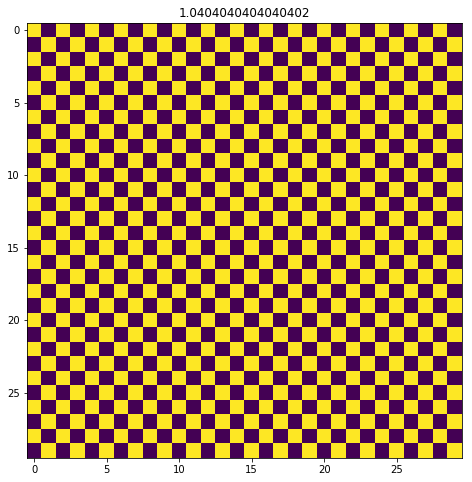

In [4]:
#random starting lattice matrix
lat = np.random.randint(0, 2, (N, N)) * 2 - 1

#vector for magnetization
m = [] 

#vector for starggered marnetization 
ms = []

#vectors for energies
e = []
es = []

#prep the figure
fig = plt.figure(1, (8, 8))
ax = fig.gca()
plt.show()

for k in range(0, iterations):
    #draw the lattice every other iteration 
    if k % 2 == 0:
        clear_output(wait = True)
        #print(k)
        ax.imshow(lat)
        ax.set_title(T[k])
        fig.canvas.draw()
        fig.canvas.flush_events()
        display(fig)

    #loop over all the elements in the lattice
    for i in range(0, N):
        for j in range(0, N):
            #calculate the energy
            energy = H(i, j)
            
            #store the energy
            e.append(energy)
            
            #change the current element in the lattice
            lat[i, j] *= -1
            
            #calculate the change in energy
            de = H(i, j) - energy
            
            #if the change was better than a random change keep it
            if np.random.random() > np.exp(de / T[k]):
                #else change the value back to the original one
                lat[i, j] *= -1
                
    #store the average energy of the lattice
    es.append(np.mean(e))
    e = []
    
    #calculate the magnetization
    m.append(1 / N**2 * abs(np.sum(lat)))
    
    #calculate the staggered magnetization
    ms.append(1 / N**2 * abs(np.sum(lat * sng)))
    

#### The groud state for the $p=1$ case is a checkerboard.

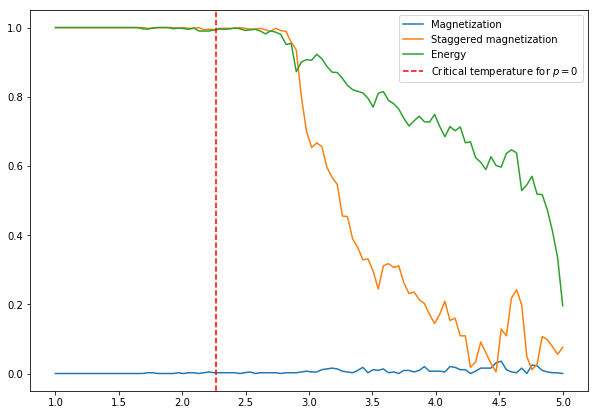

In [26]:
plt.figure(1, (10, 7))
plt.plot(T,m, label = "Magnetization")
plt.plot(T, ms, label = "Staggered magnetization")
plt.plot(T,np.array(es)/8, label = "Energy")
plt.axvline(2.27, color = "red", linestyle = "--", label = "Critical temperature for $p = 0$")
plt.legend()
plt.show()

If we plot the energy and the magnetizations for a single run we can see that we reach a stable state where the magnitization and energy don't change anymore. The critical tempertature is a bit diffetent since we know it only for the $p = 0$ but we are in the same ball park. 

#### Re-writing code and making it a function so that we can use it more easily.

In [8]:
def H2(i, j, J, lat, N):
    u = j - 1 if j - 1 >= 0 else N - 1
    d = j + 1 if j + 1 < N else 0
    l = i - 1 if i - 1 >= 0 else N - 1
    r = i + 1 if i + 1 < N else  0

    e = lat[i, u] * J[i, u] + lat[r, j] * J[r, j] + lat[i, d] * J[i, d] + lat[l, j] * J[l, j] 

    return 2* lat[i, j] * e

In [9]:
def anneal(p, N, iters, Th, Tl):
    lat = np.ones((N,N))
    J = np.ones((N,N))
    sng = np.ones((N,N))

    for i in range(0, N):
        for j in range(0, N):
            if np.random.rand() < p:
                J[i, j] = -1

    sng[::2, ::2] = -1
    sng[1::2, 1::2] = -1

    T = np.linspace(Th, Tl, iters)
    
    lat = np.random.randint(0, 2, (N, N)) * 2 - 1
    m = np.zeros(iters) 
    ms = np.zeros(iters)
    for k in range(0, iters):
        #clear_output(wait = True)
        #print(k)

        for i in range(0, N):
            for j in range(0, N):
                energy = H2(i, j, J, lat, N)
                de = -energy
                if np.random.random() < np.exp(de / T[k]):
                    lat[i, j] *= -1
        m[k] = (1 / N**2 * abs(np.sum(lat)))
        ms[k] = (1 / N**2 * abs(np.sum(lat * sng)))
        
    return m, ms, lat

#### Veryfying the critical temperature for $p=0$

In [71]:
n = 15 #lattice dimensions nxn
p = 0 
start_temp = 4
end_temp = 1
iters = 200 #iterations for p=0
steps = 200 #steps for tempertature

#vectors for the magnetizations
ma = np.zeros(steps)
msa = np.zeros(steps)

#run the code simultaion iters times
for i in range(0, iters):
    clear_output(wait = True)
    print(i)
    m, ms, lat = anneal(p, n, steps, start_temp, end_temp)
    
    #add the results to the result vectors
    ma += m
    msa += ms
    
#take the average
ma /= iters
msa /= iters

199


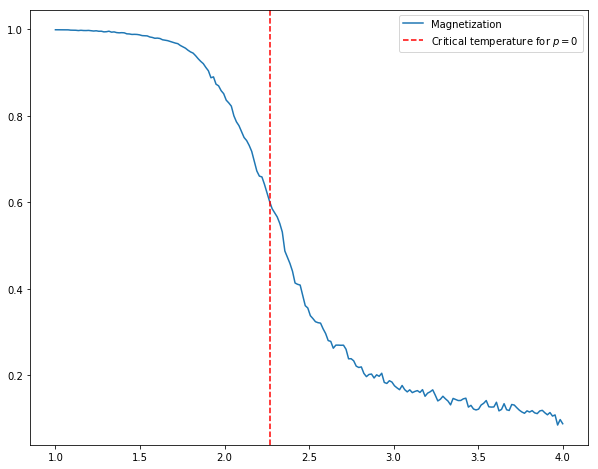

In [72]:
plt.figure(1, (10, 8))

plt.plot(np.linspace(start_temp, end_temp, steps), ma, label = "Magnetization")
plt.axvline(2.27, color = "red", linestyle = "--", label = "Critical temperature for $p = 0$")
plt.legend()
plt.show()

We see that the critical temperature sits quite well in the middle of the rize of the magnetizationg curve so our simulation probaly works.

### b) Ground state magnetizations as a function of p 
We run a simulation for multiple different p-values multiple times, save the results to vector and plot the results.

39
P: 1.0
Magnetization: [[0.999375 0.967625 0.817875 0.582    0.356375 0.202625 0.13825  0.08075
  0.03825  0.039625 0.030125 0.042    0.03275  0.03775  0.035375 0.027125
  0.0295   0.029125 0.026375 0.028875 0.02625  0.038125 0.036    0.030875
  0.027375 0.0235   0.020375 0.012    0.005   ]]
Staggered: [[3.75000e-04 5.87500e-03 1.03750e-02 1.87500e-02 2.53750e-02 3.06250e-02
  2.92500e-02 3.32500e-02 2.70000e-02 3.36250e-02 2.98750e-02 3.40000e-02
  2.95000e-02 2.57500e-02 3.18750e-02 2.93750e-02 2.92500e-02 2.86250e-02
  3.08750e-02 3.86250e-02 4.17500e-02 5.83750e-02 6.87500e-02 1.36375e-01
  2.00875e-01 3.25500e-01 5.14875e-01 8.20000e-01 8.70000e-01]]


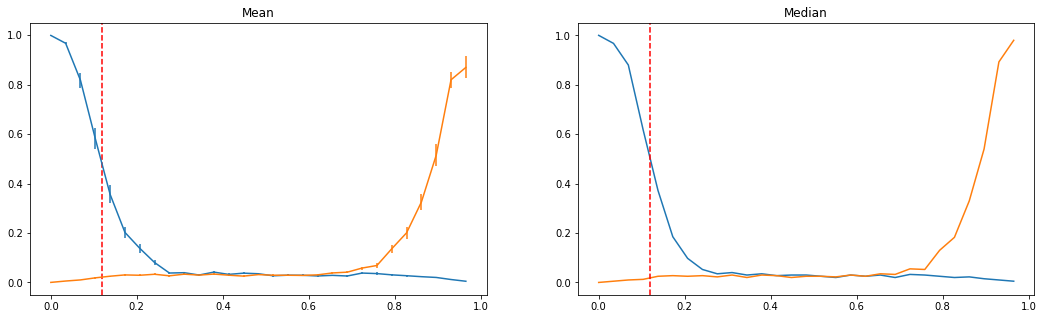

In [10]:
n_p = 30 #number of different p values
p_iters = 40 #number of iterations per p
N = 20 #lattice size
iters = 200 #steps in simulation
Th = 3 #high temp
Tl = 1 #low temp

ps = np.linspace(0,1, n_p) #vector of p's
m = np.zeros((iters, n_p, p_iters)) #vector for magnetizations
ms = np.zeros((iters, n_p, p_iters)) #vector for staggered magnetizations
for i in range(0, n_p):
    for k in range(0, p_iters):
        
        #some printing and plotting to know what is goin on in the simulation to know what is 
        clear_output(wait = True)    
        print(k)
        print("P: "  + str(ps[i]))
        print("Magnetization: " + str(np.mean(m[-1:,:i,:], axis = 2)))
        print("Staggered: " + str(np.mean(ms[-1:,:i,:], axis = 2)))
        
        plt.figure(1, (18, 5))
        
        plt.subplot(1, 2, 1)
        plt.title("Mean")
        plt.errorbar(ps[:i], np.mean(m[-1,:i,:], axis = 1), m[-1,:i,:].std(axis = 1) / np.sqrt(p_iters))
        plt.errorbar(ps[:i], np.mean(ms[-1,:i,:], axis = 1), ms[-1,:i,:].std(axis = 1) / np.sqrt(p_iters))
        plt.axvline(0.12, color = "red", linestyle = "--")
        
        plt.subplot(1, 2, 2)
        plt.title("Median")
        plt.plot(ps[:i], np.median(m[-1,:i,:], axis = 1))
        plt.plot(ps[:i], np.median(ms[-1,:i,:], axis = 1))
        plt.axvline(0.12, color = "red", linestyle = "--")
        
        plt.show()
        
        #run simumlation and save the variables
        temp_m, temp_ms, lat = anneal(ps[i], N, iters, Th, Tl)
        m[:, i, k] = temp_m
        ms[:, i, k] = temp_ms
   

    

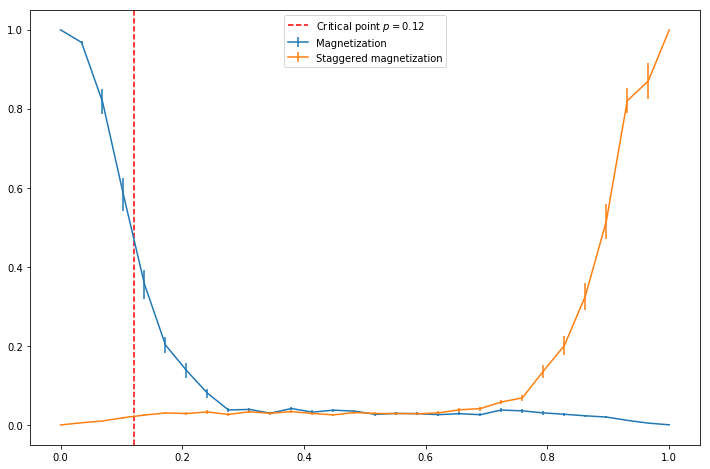

In [40]:
plt.figure(1, (12, 8)) 

plt.errorbar(ps, m[-1,:,:].mean(axis = 1), m[-1,:,:].std(axis = 1) / np.sqrt(p_iters ), label = "Magnetization")
plt.errorbar(ps, ms[-1,:,:].mean(axis = 1), ms[-1,:,:].std(axis = 1) / np.sqrt(p_iters ), label = "Staggered magnetization")
plt.axvline(0.12, color = "red", linestyle = "--", label = "Critical point $p = 0.12$")
plt.legend()


We can see that with low $p$ values the magnetization is high and for high $p$ values staggered magnetization we can also see that the known crtical point alings pretty well with the highest slope of the magnetization curve. Even thoug we have don't too large of an iteration count we still have reasonable error estimates. The error estimates are calculated using formula $\epsilon = \frac{\sigma}{\sqrt{N}}$.

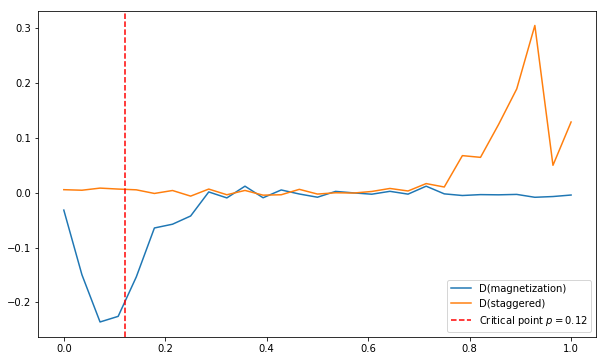

In [29]:
plt.figure(1, (10, 6))
plt.plot(np.linspace(0,1, n_p - 1), np.diff(m[-1,:,:].mean(axis = 1)), label = "D(magnetization)")
plt.plot(np.linspace(0,1, n_p - 1), np.diff(ms[-1,:,:].mean(axis = 1)), label = "D(staggered)")
plt.axvline(0.12, linestyle = "--", color = "red", label = "Critical point $p=0.12$")
plt.legend()
plt.show()

When we plot the derivatives of the magnetizations we can see that the maximun derivative of staggered magnetization is probably located between fifth and third last $p$-values.

In [30]:
ps[-3]

0.9310344827586207

In [34]:
ps[-5]

0.8620689655172413

### c) Other critical point

The other critical point is probably related to the staggered magnetization. Since for the regular magnitization the critical point is located in the vincinity of the maximum derivative of magnitization the other critical point is probably located near the maximum derivative of staggered magnetization. Here our lattice size $L = 20 \approx \infty$ but still the results might not be too accurate. Still, it is probably safe to say that the critical point is located between $p=0.86$ and $p=0.93$. 

Since for the regular magnetization it held that $\langle m \rangle > 0$ when $ p< 0.12$ and $\langle m \rangle = 0$ otherwise it will probably hold for staggered magnitization that past the critical point $\langle m_s \rangle > 0$ and $\langle m_s \rangle = 0$ otherwise.

#### d) I used about 10 hours for this exercise.